In [80]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import imblearn
import seaborn as sns

import importlib
import Projet7_utils as utils
importlib.reload(utils)

<module 'Projet7_utils' from 'e:\\Git\\OpenClassrooms_Projet7\\Projet7_utils.py'>

In [81]:
PATH = "E:/OpenClassrooms/Projet7/Data"

df_check = pd.read_csv(os.path.join(PATH, "application_train.csv"))

In [82]:
df_check['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [83]:
PATH = "E:/OpenClassrooms/Projet7/Data"

df = pd.read_csv(os.path.join(PATH, "application_train.csv"))

In [84]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [85]:
df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

## Cleaning, feature engineering

In [86]:
to_drop = [
    'NAME_TYPE_SUITE',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'OWN_CAR_AGE',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'OCCUPATION_TYPE'
]

df = df.drop(to_drop, axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
maybe_drop = [
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY',
    'REGION_POPULATION_RELATIVE',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'APARTMENTS_AVG',
    'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG',
    'COMMONAREA_AVG',
    'ELEVATORS_AVG',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',
    'LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG',
    'APARTMENTS_MODE',
    'BASEMENTAREA_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE',
    'COMMONAREA_MODE',
    'ELEVATORS_MODE',
    'ENTRANCES_MODE',
    'FLOORSMAX_MODE',
    'FLOORSMIN_MODE',
    'LANDAREA_MODE',
    'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI',
    'COMMONAREA_MEDI',
    'ELEVATORS_MEDI',
    'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI',
    'FLOORSMIN_MEDI',
    'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_MEDI',
    'TOTALAREA_MODE',
    'FONDKAPREMONT_MODE',
    'WALLSMATERIAL_MODE',
    'HOUSETYPE_MODE'    
]

df = df.drop(maybe_drop, axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1,0,1.0,Business Entity Type 3,No
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Higher education,Married,House / apartment,-16765,-1188,1,0,2.0,School,No
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1,0,1.0,Government,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,1,0,2.0,Business Entity Type 3,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1,0,1.0,Religion,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Secondary / secondary special,Separated,With parents,-9327,-236,1,0,1.0,Services,No
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,Secondary / secondary special,Widow,House / apartment,-20775,365243,1,0,1.0,XNA,No
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Higher education,Separated,House / apartment,-14966,-7921,1,1,1.0,School,No
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Secondary / secondary special,Married,House / apartment,-11961,-4786,1,0,2.0,Business Entity Type 1,No


In [88]:
ind = df.loc[df['AMT_ANNUITY'].isna()].index
df = df.drop(ind, axis=0)

ind = df.loc[df['CNT_FAM_MEMBERS'].isna()].index
df = df.drop(ind, axis=0)

ind = df.loc[df['AMT_GOODS_PRICE'].isna()].index
df = df.drop(ind, axis=0)

In [89]:
df['INCOME_CREDIT_RATE'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['ANNUITY_INCOME_RATE'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

In [90]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [91]:
ind = df.loc[df['CODE_GENDER']=='XNA'].index

df = df.drop(ind, axis=0)

In [92]:
df['CNT_CHILDREN'].value_counts()

0     215180
1      61050
2      26723
3       3711
4        427
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [93]:
ind = df.loc[df['CNT_CHILDREN']>5].index

df = df.drop(ind, axis=0)

In [94]:
df['CNT_CHILDREN'].value_counts()

0    215180
1     61050
2     26723
3      3711
4       427
5        84
Name: CNT_CHILDREN, dtype: int64

In [95]:
importlib.reload(utils)

list_cat_to_binary = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'EMERGENCYSTATE_MODE'
]

for i in list_cat_to_binary:
    df[i] = utils.cat_to_binary(df[i])

In [96]:
df = df.set_index('SK_ID_CURR')

In [97]:
df.isnull().sum().sort_values(ascending=False).head()

TARGET                 0
NAME_CONTRACT_TYPE     0
ANNUITY_INCOME_RATE    0
INCOME_CREDIT_RATE     0
EMERGENCYSTATE_MODE    0
dtype: int64

In [98]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,-9461,-637,1,0,1.0,Business Entity Type 3,0,0.498036,0.121978,0.060749
100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,-16765,-1188,1,0,2.0,School,0,0.208736,0.132217,0.027598
100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,-19046,-225,1,0,1.0,Government,1,0.500000,0.100000,0.050000
100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,-19005,-3039,1,0,2.0,Business Entity Type 3,1,0.431748,0.219900,0.094941
100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,-19932,-3038,1,0,1.0,Religion,1,0.236842,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,...,-9327,-236,1,0,1.0,Services,0,0.618375,0.174971,0.108198
456252,0,0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,...,-20775,365243,1,0,1.0,XNA,0,0.267112,0.166687,0.044524
456253,0,0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,...,-14966,-7921,1,1,1.0,School,0,0.225776,0.195941,0.044239


In [99]:
#days_employed = 365243 =outliers, replace to mean
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].mean())

In [100]:
df.isnull().sum().sort_values(ascending=False).head()

TARGET                 0
NAME_CONTRACT_TYPE     0
ANNUITY_INCOME_RATE    0
INCOME_CREDIT_RATE     0
EMERGENCYSTATE_MODE    0
dtype: int64

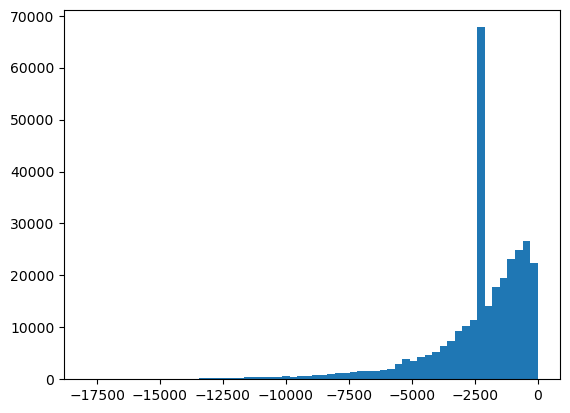

In [101]:
plt.hist(df['DAYS_EMPLOYED'], bins=60)
plt.show()

In [102]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,-9461,-637.000000,1,0,1.0,Business Entity Type 3,0,0.498036,0.121978,0.060749
100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,-16765,-1188.000000,1,0,2.0,School,0,0.208736,0.132217,0.027598
100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,-19046,-225.000000,1,0,1.0,Government,1,0.500000,0.100000,0.050000
100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,-19005,-3039.000000,1,0,2.0,Business Entity Type 3,1,0.431748,0.219900,0.094941
100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,-19932,-3038.000000,1,0,1.0,Religion,1,0.236842,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,...,-9327,-236.000000,1,0,1.0,Services,0,0.618375,0.174971,0.108198
456252,0,0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,...,-20775,-2384.321885,1,0,1.0,XNA,0,0.267112,0.166687,0.044524
456253,0,0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,...,-14966,-7921.000000,1,1,1.0,School,0,0.225776,0.195941,0.044239


## Outliers

In [103]:
df.columns.tolist()

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'INCOME_CREDIT_RATE',
 'ANNUITY_INCOME_RATE',
 'PAYMENT_RATE']

In [104]:
List_mean = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'INCOME_CREDIT_RATE',
    'ANNUITY_INCOME_RATE',
    'PAYMENT_RATE'    
]

In [105]:
importlib.reload(utils)

for i in List_mean:
    df[i] = utils.set_outlier_nan(df[i])

df[List_mean] = utils.imput(df, List_mean, 'mean')

e:\Git\OpenClassrooms_Projet7\Projet7_utils.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.iloc[i]=float('nan')  #set to NaN


In [106]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,-9461,-637.000000,1,0,1.0,Business Entity Type 3,0,0.498036,0.121978,0.060749
100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,-16765,-1188.000000,1,0,2.0,School,0,0.208736,0.132217,0.027598
100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,-19046,-225.000000,1,0,1.0,Government,1,0.500000,0.100000,0.050000
100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,-19005,-3039.000000,1,0,2.0,Business Entity Type 3,1,0.431748,0.219900,0.094941
100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,-19932,-3038.000000,1,0,1.0,Religion,1,0.236842,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,0,0,0,1,0,157500.0,254700.0,27558.0,225000.0,...,-9327,-236.000000,1,0,1.0,Services,0,0.618375,0.174971,0.050615
456252,0,0,1,0,0,0,72000.0,269550.0,12001.5,225000.0,...,-20775,-2384.321885,1,0,1.0,XNA,0,0.267112,0.166687,0.044524
456253,0,0,1,0,0,0,153000.0,677664.0,29979.0,585000.0,...,-14966,-7921.000000,1,1,1.0,School,0,0.225776,0.195941,0.044239


# Correlations

<AxesSubplot:>

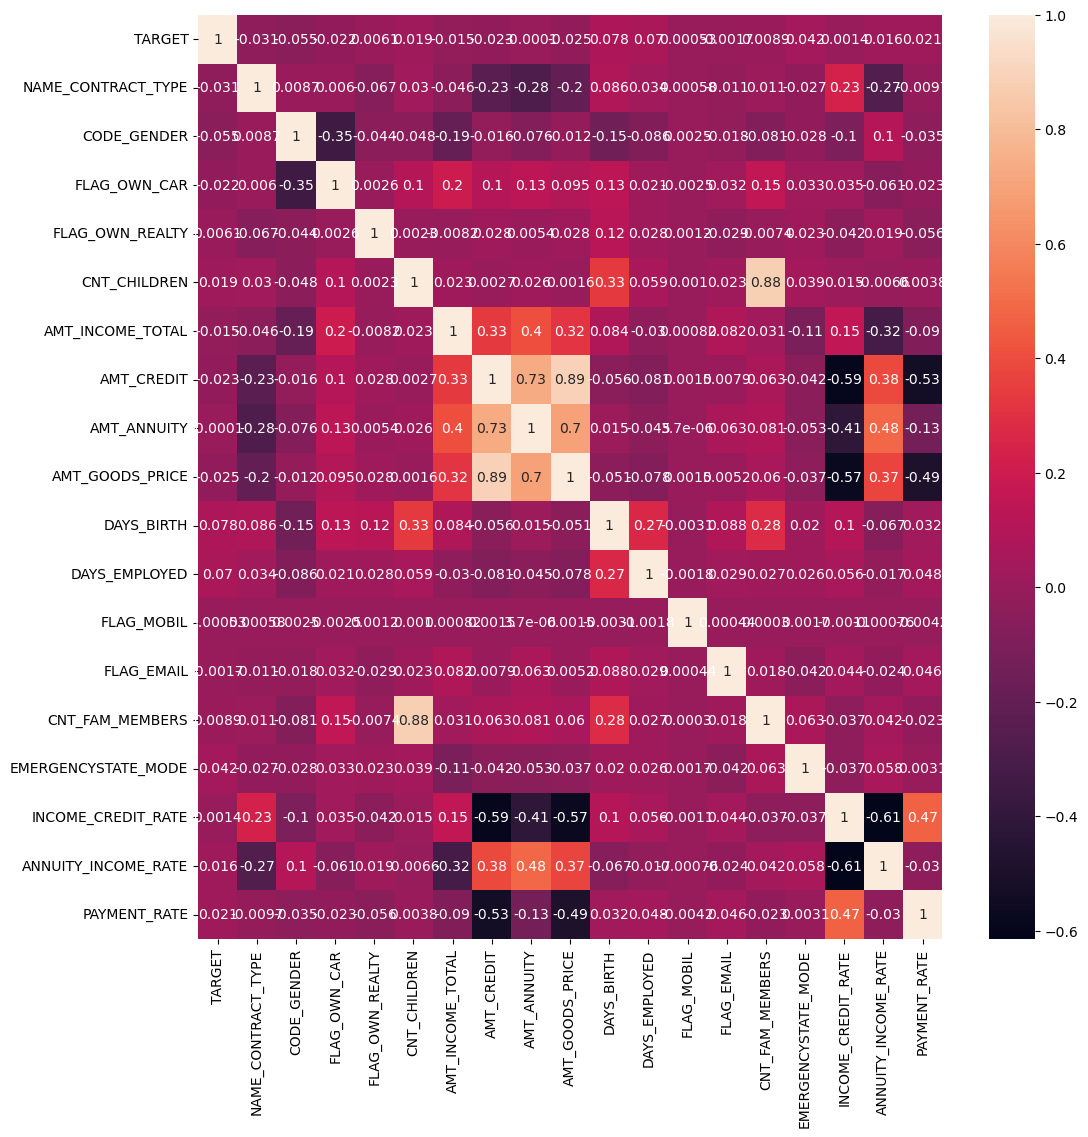

In [107]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

# Preprocess data

In [108]:
# split data and target
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [109]:
list_cat_other = [i for i in df.columns.tolist() if df[i].dtypes=='O' and i not in list_cat_to_binary]
list_cat_other

['NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE']

In [110]:
importlib.reload(utils)

X_train, X_test, y_train, y_test = utils.preprocess_data(X, y, list_cat_other)

e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [111]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,...,ORGANIZATION_TYPE:Legal Services,ORGANIZATION_TYPE:Advertising,ORGANIZATION_TYPE:Trade: type 5,ORGANIZATION_TYPE:Cleaning,ORGANIZATION_TYPE:Industry: type 13,ORGANIZATION_TYPE:Trade: type 4,ORGANIZATION_TYPE:Telecom,ORGANIZATION_TYPE:Industry: type 8,ORGANIZATION_TYPE:Realtor,ORGANIZATION_TYPE:Industry: type 6
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
134315,-0.322679,0.720987,-0.717607,-0.663095,3.619076,-1.389683,1.244719,0.295836,0.820347,0.426651,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
271769,-0.322679,0.720987,-0.717607,1.508081,-0.580787,-0.309462,-1.184161,-1.595399,-1.163196,-1.659680,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.602304
131942,-0.322679,-1.386988,-0.717607,1.508081,0.819168,0.770760,0.928498,0.310734,0.677532,0.054968,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
168869,3.099052,-1.386988,1.393521,-0.663095,2.219122,1.850982,0.685597,1.204583,1.137714,-0.584529,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
409669,-0.322679,0.720987,-0.717607,-0.663095,-0.580787,-0.309462,0.728073,-0.230790,0.709268,-1.238700,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.602304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239157,-0.322679,-1.386988,1.393521,-0.663095,0.819168,0.050612,-1.179106,-1.192422,-1.274275,0.214784,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
400259,-0.322679,0.720987,1.393521,1.508081,-0.580787,-0.813565,2.232983,0.848905,-0.001295,1.295668,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
253168,-0.322679,0.720987,-0.717607,-0.663095,0.819168,0.050612,0.298750,0.550956,0.661663,0.493375,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [112]:
y_train

SK_ID_CURR
134315    0
271769    0
131942    0
168869    0
409669    0
         ..
239157    0
400259    0
253168    1
270456    0
241543    0
Name: TARGET, Length: 245740, dtype: int64

# Dummy classifier

In [113]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

dummy_predict = dummy_clf.predict(X_test.values)
print("Accuracy: ", dummy_clf.score(dummy_predict, y_test))
print("AUROC: ", roc_auc_score(y_test, dummy_predict))

Accuracy:  0.9192317083095956
AUROC:  0.5


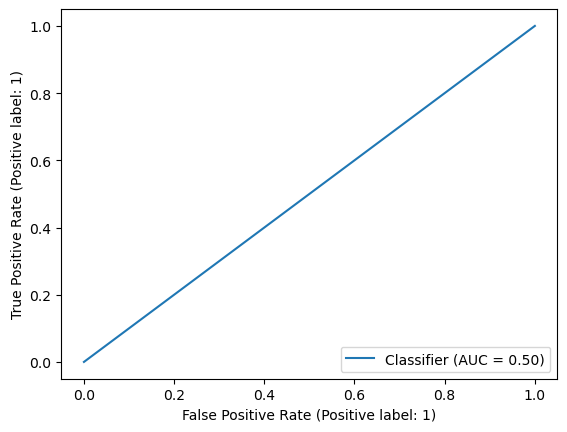

In [114]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, dummy_predict)

# Logistic regression

In [116]:
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train.values, y_train.ravel())

model_smote = imbpipe(steps=[
    ('sampling', SMOTE()),
    ('classification', LogisticRegression())
    ])

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [50, 100, 200]
}

"""LogReg_smote = GridSearchCV(
    model_smote,
    param_grid=par_grid,
    scoring='roc_auc',
    verbose=1,
    n_jobs=4
    )

LogReg_smote.fit(X_train, y_train)

print('Best hyperparams: ', LogReg_smote.best_params_)
print('Best mean score: ', LogReg_smote.best_score_)
print('std: ', LogReg_smote.cv_results_['std_test_score'][LogReg_smote.best_index_])

LogReg_predict = LogReg_smote.predict(X_test)"""



LogReg_smote = utils.train_model(model_smote, par_grid, X_train, y_train, 'roc_auc')
LogReg_smote_predict = LogReg_smote.predict(X_test.values)
print("AUROC: ", roc_auc_score(y_test, LogReg_smote_predict))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparams:  {'classification__C': 10.0, 'classification__max_iter': 100, 'classification__tol': 0.001}
Best mean score:  0.6500204041881253
std:  0.0021530975914475685
AUROC:  0.6081000831114158


## Logistic regression - Random under sampling


In [117]:
importlib.reload(utils)
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

model_LogReg_under = imbpipe(steps=[
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classification', LogisticRegression())
    ])

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [300, 400, 500]
}

LogReg_under = utils.train_model(model_LogReg_under, par_grid, X_train, y_train, 'roc_auc')
LogReg_under_predict = LogReg_under.predict(X_test.values)
print("AUROC: ", roc_auc_score(y_test, LogReg_under_predict))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparams:  {'classification__C': 0.1, 'classification__max_iter': 300, 'classification__tol': 1e-05}
Best mean score:  0.6522294705578839
std:  0.001707954040080557
AUROC:  0.6090707327631636


## Logistic regression - Random over sampling

In [118]:
importlib.reload(utils)
from imblearn.over_sampling import RandomOverSampler

model_LogReg_over = imbpipe(steps=[
    ('sampling', RandomOverSampler(random_state=42)),
    ('classification', LogisticRegression())
    ])

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [300, 400, 500]
}

LogReg_over = utils.train_model(model_LogReg_over, par_grid, X_train, y_train, 'roc_auc')
LogReg_over_predict = LogReg_over.predict(X_test.values)
print("AUROC: ", roc_auc_score(y_test, LogReg_over_predict))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparams:  {'classification__C': 7.525, 'classification__max_iter': 300, 'classification__tol': 1e-05}
Best mean score:  0.653110308364863
std:  0.0022286471094698757
AUROC:  0.6095429258968305


# Random Forest

In [119]:
importlib.reload(utils)
from sklearn.ensemble import RandomForestClassifier

model_rf = imbpipe(steps=[
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classification', RandomForestClassifier(random_state=42))
])

par_grid = {
    'classification__max_depth': [10, 25, 50, 100],
    'classification__min_samples_split': [2, 3, 5],
    'classification__max_features': ['sqrt', 'log2'],
    'classification__min_samples_leaf': [1, 3, 5, 10]
}

rf = utils.train_model(model_rf, par_grid, X_train, y_train, 'roc_auc')
rf_predict = rf.predict(X_test.values)
print("AUROC: ", roc_auc_score(y_test, rf_predict))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best hyperparams:  {'classification__max_depth': 50, 'classification__max_features': 'sqrt', 'classification__min_samples_leaf': 10, 'classification__min_samples_split': 2}
Best mean score:  0.6723696685717295
std:  0.002249616776757599
AUROC:  0.6254485143346405


# XGBoost

In [125]:
importlib.reload(utils)
from xgboost import XGBClassifier

model_xgb = imbpipe(steps=[
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classification', XGBClassifier(n_estimators=100, random_state=42))
])

par_grid = {
    'classification__max_depth': [5, 10, 15, 30, 50],
    'classification__learning_rate': [.01, .05, .1, .2, .3, .5],
    'classification__colsample_bytree': [.5, .66, .75, 1]
}

xgb = utils.train_model(model_xgb, par_grid, X_train, y_train, 'roc_auc')
xgb_predict = xgb.predict(X_test.values)
print("AUROC: ", roc_auc_score(y_test, xgb_predict))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best hyperparams:  {'classification__colsample_bytree': 0.66, 'classification__learning_rate': 0.2, 'classification__max_depth': 5}
Best mean score:  0.6933710803150815
std:  0.0025873684062438654
AUROC:  0.6433767598635505


In [158]:
def stupid_scorer(y_true, y_pred):
    
    return np.mean(np.square(y_true - y_pred))


rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

score = make_scorer(utils.score_func, greater_is_better=False)

par_grid = {
    #'classification__max_depth': [10, 25, 50, 100],
    #'classification__min_samples_split': [2, 3, 5],
    'max_features': ['sqrt'],
    #'classification__min_samples_leaf': [1, 3, 5, 10]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(),
    param_grid=par_grid,
    cv=5,
    scoring=score,
    n_jobs=4,
    verbose=1
)

rf_grid.fit(X_res.values, y_res.values)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


e:\Anaconda\envs\projet7\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_features': ['sqrt']},
             scoring=make_scorer(score_func, greater_is_better=False),
             verbose=1)

In [159]:
print('Best hyperparams: ', rf_grid.best_params_)
print('Best mean score: ', rf_grid.best_score_)
print('std: ', rf_grid.cv_results_['std_test_score'][rf_grid.best_index_])

Best hyperparams:  {'max_features': 'sqrt'}
Best mean score:  nan
std:  nan


In [160]:
utils.score_func(pd.DataFrame([1, 1, 0, 0], columns=['TARGET']), np.array([0,0,0,0]))

A : 2
B : 2
C : 0
D : 0


0.4

In [165]:
unique, counts = np.unique(rf_grid.predict(y_test).reshape(-1, 1), return_counts=True)
counts

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [123]:
importlib.reload(utils)
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer

#score = make_scorer(utils.score_func, greater_is_better=False)


"""LogReg_under_2 = imbpipe(steps=[
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classification', LogisticRegression())
    ])

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [300, 400, 500]
}"""

#LogReg_under_predict2 = utils.train_model_predict(LogReg_under_2, par_grid, X_train, y_train, X_test, score)

par_grid = {
    'classification__max_depth': [10, 25, 50, 100],
    'classification__min_samples_split': [2, 3, 5],
    'classification__max_features': ['sqrt', 'log2'],
    'classification__min_samples_leaf': [1, 3, 5, 10]
}
rf_custom = utils.train_model(rf, par_grid, X_train, y_train, score)
rf_custom_predict = rf_custom.predict(X_test.values)
print(utils.score_func(y_test, rf_custom_predict))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


e:\Anaconda\envs\projet7\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


Best hyperparams:  {'classification__max_depth': 10, 'classification__max_features': 'sqrt', 'classification__min_samples_leaf': 1, 'classification__min_samples_split': 2}
Best mean score:  nan
std:  nan
A : 34296
B : 1931
C : 22177
D : 3031
0.09734190607959634


In [ ]:
model_train = GridSearchCV(
        ,
        param_grid=par_grid,
        scoring=scorer,
        n_jobs=4,
        verbose=1
    )

    model_train.fit(X_train.values, y_train.values)

    print('Best hyperparams: ', model_train.best_params_)
    print('Best mean score: ', model_train.best_score_)
    print('std: ', model_train.cv_results_['std_test_score'][model_train.best_index_])

In [124]:
print(utils.score_func(y_test, rf_predict_custom))

A : 35419
B : 1912
C : 21054
D : 3050
0.09343859363554978


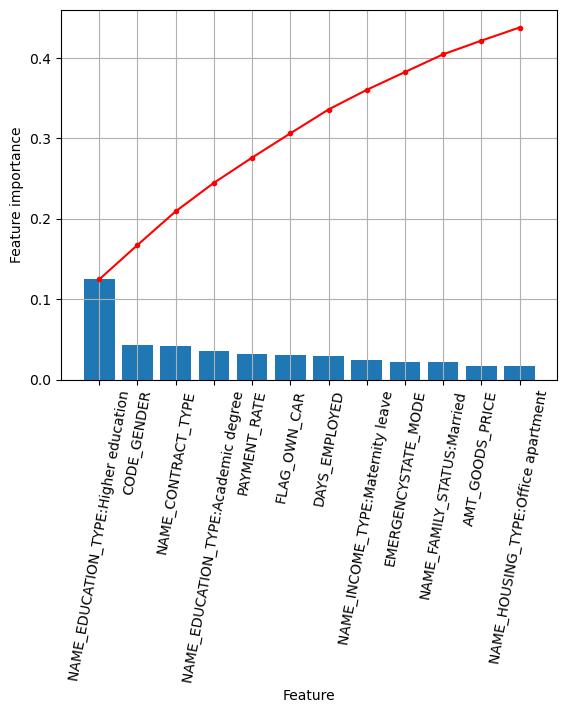

In [140]:
xgb_best = xgb.best_estimator_

importance_xgb = pd.DataFrame.from_dict({
    'name': X_train.columns.to_list(),
    'feature_imp': xgb_best.named_steps['classification'].feature_importances_
})

importance_xgb = importance_xgb.sort_values(by=['feature_imp'], ascending=False)
cumul_importance = np.cumsum(importance_xgb['feature_imp'].head(12))

#fig, ax = plt.figure(figsize=(10,8))

plt.bar(importance_xgb['name'].head(12), importance_xgb['feature_imp'].head(12))
plt.plot(importance_xgb['name'].head(12), cumul_importance, marker='.', c='r')

plt.xlabel('Feature')
plt.ylabel('Feature importance')
plt.xticks(ticks=np.linspace(0, 11, 12), labels=importance_xgb['name'].head(12), rotation=80)
plt.grid()

plt.show()

In [144]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    X_train,
    mode='classification',
    feature_names=xgb_best.named_steps['classification'].feature_names
)

explainer

AttributeError: 'XGBClassifier' object has no attribute 'feature_names'